# Carga de datos

In [79]:
import os

# URL del archivo en GitHub
url_archivo_github = 'https://raw.githubusercontent.com/SekDak12/Proyecto-Ciencia/main/2023%20QS.csv'

# Ruta donde se guardará el archivo descargado
ruta_guardado = '2023 QS.csv'

# Comando para descargar usando wget
comando_wget = f'wget {url_archivo_github} '

# Ejecutar el comando para descargar
os.system(comando_wget)

0

In [80]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt

df = pd.read_csv ("2023 QS.csv")
df

df1 = pd.read_csv ("2023 QS.csv")


# Limpieza nueva

In [81]:
##
## Nueva Limpieza
##

df1= df.drop("ar rank", axis=1)
df2= df1.drop("er rank", axis=1)
df3= df2.drop("fsr rank", axis=1)
df4= df3.drop("cpf rank", axis=1)
df5= df4.drop("ifr rank", axis=1)
df6= df5.drop("irn rank", axis=1)
df7= df6.drop("isr rank", axis=1)
dfclean= df7.drop("ger rank", axis=1)


dfclean

,Rank,institution,location code,location,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0,100
1,2,University of Cambridge,UK,United Kingdom,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0,98.8
2,3,Stanford University,US,United States,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0,98.4
4,5,Harvard University,US,United States,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1418,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,4.6,5.8,3.6,1.0,1.7,NaN,8.1,NaN,-
1418,1419,Universidad Tecnológica de Bolívar,CO,Colombia,3.0,5.8,2.4,2.2,9.3,1.3,8.8,30.9,-
1419,1420,Université Mohammed V de Rabat,MA,Morocco,2.8,2.6,3.2,3.6,5.2,2.8,51.1,NaN,-
1420,1421,University of Craiova,RO,Romania,3.3,1.8,2.7,2.0,NaN,NaN,7.5,8.7,-


In [82]:
valor_a_contar = "-"
conteo = (df['score scaled'] == valor_a_contar).sum()
print(conteo)



922


In [83]:
#Vamos a tratar de eliminar un inconveniente con el dato df['score scaled'] = df['score scaled'].astype(float) ya que, este dato oriinalmente
#Se trata de un sting con elements - que seran reemplados y el dominio del resto de datos es de  24.2 a 100, estos se reemplazaran con 0

dfclean['score scaled'] = dfclean["score scaled"].replace(["-"],[0] )
dfclean['score scaled'] = dfclean['score scaled'].astype(float)

##
## Se arreglo dicho error creando un modelo de regresion en las secciones adelante
##

In [84]:
dfclean.isnull().sum()

Rank              0
institution       0
location code     0
location          0
ar score          0
er score          1
fsr score         2
cpf score         5
ifr score        98
isr score        57
irn score        13
ger score        12
score scaled      0
dtype: int64

In [85]:
#Los NaN en er score, fsr score, cpf score al contar con una menor cantidad de NaNs se reemplazaran como 0.

dfclean['er score'].fillna(0, inplace=True)
dfclean['fsr score'].fillna(0, inplace=True)
dfclean['cpf score'].fillna(0, inplace=True)

#Los Nan con respecto a ifr, isr, irn seran transformados por las media de sus datos, ya que estos se encuentran
#Relacionados con la falta de informacion de la colaboraciones internacionales de las universidades

media_ifr = dfclean['ifr score'].mean()
dfclean['ifr score'].fillna(media_ifr, inplace=True)

media_isr = dfclean['isr score'].mean()
dfclean['isr score'].fillna(media_isr, inplace=True)

media_irn = dfclean['irn score'].mean()
dfclean['irn score'].fillna(media_irn, inplace=True)

media_ger = dfclean['ger score'].mean()
dfclean['ger score'].fillna(media_ger, inplace=True)

In [86]:
dfclean.describe()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score scaled
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,711.500000,20.124684,20.642616,29.954923,24.443108,31.659517,26.545348,49.570121,26.186809,15.688959
std,410.640354,22.802706,24.025717,28.174827,27.899638,32.971465,30.270835,30.066955,26.090171,24.008663
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,356.250000,5.400000,4.400000,8.200000,3.000000,5.200000,3.400000,21.900000,6.800000,0.000000
50%,711.500000,10.800000,10.250000,18.200000,10.950000,16.650000,12.350000,48.900000,15.700000,0.000000
75%,1066.750000,23.775000,26.950000,43.475000,39.200000,48.975000,38.625000,77.375000,36.300000,30.700000
max,1422.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


# Seleccion de variables mas relevantes al Rank.

---



In [87]:
dfclean
dfclean1 = dfclean.drop(["institution"], axis=1)
dfclean1 = dfclean1.drop(["location code"], axis=1)
dfclean1 = dfclean1.drop(["location"], axis=1)
dfclean1 = dfclean1.drop(["score scaled"], axis=1)

dfclean2 = dfclean1.drop(["Rank"], axis=1)
dfclean2

,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
0,100.0,100.0,100.0,100.0,100.000000,90.000000,96.1,100.000000
1,100.0,100.0,100.0,92.3,100.000000,96.300000,99.5,100.000000
2,100.0,100.0,100.0,99.9,99.800000,60.300000,96.3,100.000000
3,100.0,100.0,100.0,90.0,98.800000,98.400000,99.9,100.000000
4,100.0,100.0,99.4,100.0,76.900000,66.900000,100.0,100.000000
...,...,...,...,...,...,...,...,...
1417,4.6,5.8,3.6,1.0,1.700000,26.545348,8.1,26.186809
1418,3.0,5.8,2.4,2.2,9.300000,1.300000,8.8,30.900000
1419,2.8,2.6,3.2,3.6,5.200000,2.800000,51.1,26.186809
1420,3.3,1.8,2.7,2.0,31.659517,26.545348,7.5,8.700000


In [88]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2



x = dfclean1['Rank']
k = 2  # número de atributos a seleccionar
entrenar = dfclean1.drop(['Rank'], axis=1)
columnas = list(entrenar.columns.values)
seleccionadas = SelectKBest(chi2, k=k).fit(entrenar, x)
atrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos


## ['ifr score', 'isr score', 'irn score', 'ger score']   con chi2
## ['er score', 'fsr score', 'cpf score', 'ifr score', 'isr score']

## ['ifr score', 'isr score', 'irn score', 'ger score'] por f classi
## ['cpf score', 'ifr score', 'isr score', 'irn score', 'ger score']
## ['cpf score', 'ifr score', 'isr score']
## ['ifr score', 'isr score']



['ifr score', 'isr score']

In [89]:
from sklearn.feature_selection import RFE # recursive feature elimination
from sklearn.ensemble import ExtraTreesClassifier #decision trees

modelo = ExtraTreesClassifier()
erec = RFE(modelo)
erec = erec.fit(entrenar, x)
atrib = erec.support_
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos

## ['er score', 'fsr score', 'cpf score', 'irn score'] Por metodo recursivo

['er score', 'fsr score', 'irn score', 'ger score']

# Seccion de graficacion

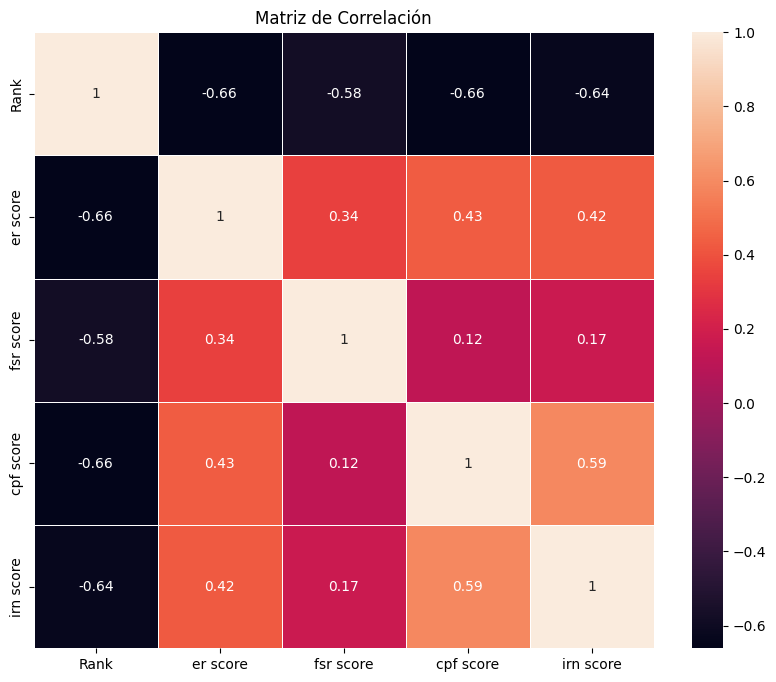

In [90]:


dfcleanp = dfclean1.drop(["ar score"], axis=1)

dfcleanp = dfcleanp.drop(["ifr score"], axis=1)
dfcleanp = dfcleanp.drop(["ger score"], axis=1)
dfcleanp = dfcleanp.drop(["isr score"], axis=1)
 # Calcula la matriz de correlación
correlation_matrix = dfcleanp.corr()

# Visualiza la  matriz de correlación utilizando seaborn
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

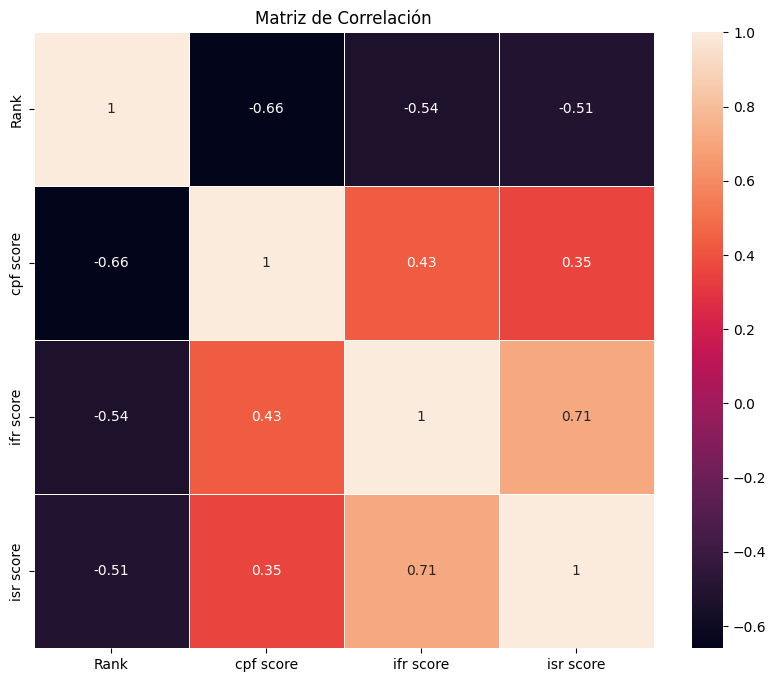

In [91]:

dfcleanp1 = dfclean1.drop(["ar score"], axis=1)
dfcleanp1 = dfcleanp1.drop(["er score"], axis=1)

dfcleanp1 = dfcleanp1.drop(["irn score"], axis=1)
dfcleanp1 = dfcleanp1.drop(["ger score"], axis=1)
dfcleanp1 = dfcleanp1.drop(["fsr score"], axis=1)
'cpf score'
dfcleanp2 = dfcleanp1.drop(['cpf score'], axis=1)

 # Calcula la matriz de correlación
correlation_matrix = dfcleanp1.corr()

# Visualiza la  matriz de correlación utilizando seaborn
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

In [92]:
dfcleanp1.head()

,Rank,cpf score,ifr score,isr score
0,1,100.0,100.0,90.0
1,2,92.3,100.0,96.3
2,3,99.9,99.8,60.3
3,4,90.0,98.8,98.4
4,5,100.0,76.9,66.9


In [93]:
dfcleanp2.head()

,Rank,ifr score,isr score
0,1,100.0,90.0
1,2,100.0,96.3
2,3,99.8,60.3
3,4,98.8,98.4
4,5,76.9,66.9


# Clasificacion mediante algoritmo CART en arboles de decision.
# *Accuracy .78*

In [94]:
# dfcleanp1 Para 3 carac
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Cargar los datos y realizar preprocesamiento básico si es necesario
# Suponiendo que tienes un DataFrame df con tus datos
# ...

# Definir intervalos y etiquetas
intervalos = [1, 50, 150, 300, float('inf')]  # Define tus intervalos según tus criterios
etiquetas = ['Excelentes', 'Buen nivel', 'Mah o meno', 'Regular']  # Define las etiquetas para cada intervalo

# Crear la variable objetivo basada en los intervalos
dfcleanp1['clasificacion'] = pd.cut(dfcleanp1['Rank'], bins=intervalos, labels=etiquetas)

# Codificar la variable objetivo ('clasificacion')
le = LabelEncoder()
dfcleanp1['label'] = le.fit_transform(dfcleanp1['clasificacion'])
X= dfcleanp1[["cpf score", "ifr score", "isr score"]]
y = dfcleanp1['label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol de decisiones
decision_tree = DecisionTreeClassifier( criterion='entropy')
decision_tree.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_dt = decision_tree.predict(X_test)

# Evaluar el modelo
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Precisión:", accuracy_dt)

# Otras métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_dt))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_dt))


Precisión: 0.7684210526315789
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.20      0.21      0.21        19
           1       0.33      0.38      0.35         8
           2       0.32      0.32      0.32        31
           3       0.90      0.89      0.89       227

    accuracy                           0.77       285
   macro avg       0.44      0.45      0.44       285
weighted avg       0.77      0.77      0.77       285

Matriz de confusión:
[[  4   3   4   8]
 [  3   3   1   1]
 [  6   1  10  14]
 [  7   2  16 202]]


In [95]:
dfcleanp1

,Rank,cpf score,ifr score,isr score,clasificacion,label
0,1,100.0,100.000000,90.000000,NaN,4
1,2,92.3,100.000000,96.300000,Excelentes,1
2,3,99.9,99.800000,60.300000,Excelentes,1
3,4,90.0,98.800000,98.400000,Excelentes,1
4,5,100.0,76.900000,66.900000,Excelentes,1
...,...,...,...,...,...,...
1417,1418,1.0,1.700000,26.545348,Regular,3
1418,1419,2.2,9.300000,1.300000,Regular,3
1419,1420,3.6,5.200000,2.800000,Regular,3
1420,1421,2.0,31.659517,26.545348,Regular,3


In [96]:
# para 2 variable dfcleanp2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Cargar los datos y realizar preprocesamiento básico si es necesario
# Suponiendo que tienes un DataFrame df con tus datos
# ...

# Definir intervalos y etiquetas
intervalos = [1, 50, 150, 300, float('inf')]  # Define tus intervalos según tus criterios
etiquetas = ['Excelentes', 'Buen nivel', 'Mah o meno', 'Regular']  # Define las etiquetas para cada intervalo

# Crear la variable objetivo basada en los intervalos
dfcleanp2['clasificacion'] = pd.cut(dfcleanp2['Rank'], bins=intervalos, labels=etiquetas)

# Codificar la variable objetivo ('clasificacion')
le = LabelEncoder()
dfcleanp2['label'] = le.fit_transform(dfcleanp2['clasificacion'])

X1 = dfcleanp2[['ifr score', 'isr score']]
y1 = dfcleanp2['label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol de decisiones
decision_tree = DecisionTreeClassifier( criterion='entropy')
decision_tree.fit(X_train1, y_train1)

# Predecir en el conjunto de prueba
y_pred_dt1 = decision_tree.predict(X_test1)

# Evaluar el modelo
accuracy_dt2 = accuracy_score(y_test, y_pred_dt1)
print("Precisión:", accuracy_dt2)

# Otras métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test1, y_pred_dt1))

print("Matriz de confusión:")
print(confusion_matrix(y_test1, y_pred_dt1))

Precisión: 0.7403508771929824
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.24      0.26      0.25        19
           1       0.29      0.50      0.36         8
           2       0.30      0.29      0.30        31
           3       0.88      0.85      0.86       227

    accuracy                           0.74       285
   macro avg       0.43      0.48      0.44       285
weighted avg       0.76      0.74      0.75       285

Matriz de confusión:
[[  5   2   2  10]
 [  2   4   0   2]
 [  5   2   9  15]
 [  9   6  19 193]]


# Clasificacion por modelo de regresion logistica

In [97]:
#Para 3 caracteristicas.

from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
# Predecir en el conjunto de prueba
y_pred_logistic = logisticRegr.predict(X_test)

# Evaluar el modelo
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Precisión:", accuracy_logistic)

# Otras métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_logistic))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_logistic))




Precisión: 0.8210526315789474
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.20      0.16      0.18        19
           1       0.00      0.00      0.00         8
           2       0.46      0.19      0.27        31
           3       0.88      0.99      0.93       227

    accuracy                           0.82       285
   macro avg       0.39      0.34      0.35       285
weighted avg       0.77      0.82      0.79       285

Matriz de confusión:
[[  3   2   4  10]
 [  5   0   2   1]
 [  6   0   6  19]
 [  1   0   1 225]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
# Para 2 caracteristicas

from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train1, y_train1)
# Predecir en el conjunto de prueba
y_pred_logistic2 = logisticRegr.predict(X_test1)

# Evaluar el modelo
accuracy_logistic2 = accuracy_score(y_test1, y_pred_logistic2)
print("Precisión:", accuracy_logistic2)

# Otras métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test1, y_pred_logistic2))
y_pred_logistic2
print("Matriz de confusión:")
print(confusion_matrix(y_test1, y_pred_logistic2))



Precisión: 0.7929824561403509
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.19      0.16      0.17        19
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        31
           3       0.83      0.98      0.90       227

    accuracy                           0.79       285
   macro avg       0.25      0.29      0.27       285
weighted avg       0.67      0.79      0.73       285

Matriz de confusión:
[[  3   0   0  16]
 [  3   0   0   5]
 [  6   0   0  25]
 [  4   0   0 223]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

# Clasificacion por Maquinas de vectores de soporte

In [99]:

from sklearn.svm import SVC

# Entrenar el modelo SVM
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

# con kernel Polinomial  Precisión: 0.8280701754385965
# con kernel lineal      Precisión: 0.8175438596491228
# con kernel sigmoid     Precisión: 0.7017543859649122
# con kernel rbf         Precisión: 0.8350877192982457


# Predecir en el conjunto de prueba
y_pred_svm = svm.predict(X_test)

# Evaluar el modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Precisión:", accuracy_svm)

# Otras métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_svm))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_svm))

Precisión: 0.8350877192982457
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.41      0.47      0.44        19
           1       1.00      0.38      0.55         8
           2       0.00      0.00      0.00        31
           3       0.87      1.00      0.93       227

    accuracy                           0.84       285
   macro avg       0.57      0.46      0.48       285
weighted avg       0.75      0.84      0.78       285

Matriz de confusión:
[[  9   0   0  10]
 [  3   3   0   2]
 [  9   0   0  22]
 [  1   0   0 226]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
from sklearn.svm import SVC

# Entrenar el modelo SVM
svm = SVC(kernel='rbf')
svm.fit(X_train1, y_train1)

# con kernel Polinomial  Precisión: 0.8280701754385965
# con kernel lineal      Precisión: 0.8175438596491228
# con kernel sigmoid     Precisión: 0.7017543859649122
# con kernel rbf         Precisión: 0.8350877192982457


# Predecir en el conjunto de prueba
y_pred_svm2 = svm.predict(X_test1)

# Evaluar el modelo
accuracy_svm2 = accuracy_score(y_test1, y_pred_svm2)
print("Precisión:", accuracy_svm2)

# Otras métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test1, y_pred_svm2))
y_pred_svm2
print("Matriz de confusión:")
print(confusion_matrix(y_test1, y_pred_svm2))

Precisión: 0.7964912280701755
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        31
           3       0.80      1.00      0.89       227

    accuracy                           0.80       285
   macro avg       0.20      0.25      0.22       285
weighted avg       0.63      0.80      0.71       285

Matriz de confusión:
[[  0   0   0  19]
 [  0   0   0   8]
 [  0   0   0  31]
 [  0   0   0 227]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from mpl_toolkits.mplot3d import Axes3D


# Crear un gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Predecir para cada punto en el espacio de características
Z = svm.decision_function(X)
ax.scatter(X_train_3d['cpf score'], X_train_3d['ifr score'], X_train_3d['isr score'], c=y, cmap='viridis')
ax.set_xlabel('cpf score')
ax.set_ylabel('ifr score')
ax.set_zlabel('isr score')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Suponiendo que ya tienes entrenado el modelo SVM en svm
# X_train es tu conjunto de entrenamiento

# Crear un gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Predecir para cada punto en el espacio de características
Z = svm.decision_function(X_train)

# Graficar los puntos de datos
scatter = ax.scatter(X_train['er score'], X_train['fsr score'], X_train['cpf score'], c=y_train, cmap='viridis')

# Crear una malla para el hiperplano
xx, yy = np.meshgrid(X_train['er score'], X_train['fsr score'])
zz = (-svm.intercept_[0] - svm.coef_[0][0] * xx - svm.coef_[0][1] * yy) / svm.coef_[0][2]

# Graficar el hiperplano
ax.plot_surface(xx, yy, zz, color='red', alpha=0.3)

# Etiquetas de los ejes
ax.set_xlabel('er score')
ax.set_ylabel('fsr score')
ax.set_zlabel('cpf score')

# Leyenda para los puntos de datos
legend = ax.legend(*scatter.legend_elements(), title="Categorías")
ax.add_artist(legend)

plt.show()


# Seccion de Fitter para Score Scaled Sigmoid

In [ ]:
pip install fitter

In [ ]:
from scipy import stats
from fitter import Fitter

# 80 distribuciones
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']
# Atributo
fitter = Fitter(dfclean["score_scaled_sigmoid"], distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)




,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.001176,1066.398343,1082.177802,inf,0.032204,1.024692e-01
chi2,0.001176,1066.397043,1082.176501,inf,0.032207,1.024153e-01
beta,0.001177,1068.095171,1089.134450,inf,0.032400,9.882907e-02
exponpow,0.003234,1057.055327,1072.834786,inf,0.089440,2.390335e-10
cauchy,0.003267,1142.830320,1153.349959,inf,0.156594,6.386626e-31
logistic,0.003869,1146.587838,1157.107477,inf,0.110127,1.782325e-15
expon,0.004643,1040.066946,1050.586586,inf,0.128198,7.815754e-21
norm,0.004880,1140.582570,1151.102209,inf,0.129632,2.707823e-21
powerlaw,0.013139,973.542018,989.321477,inf,0.192206,1.738368e-46


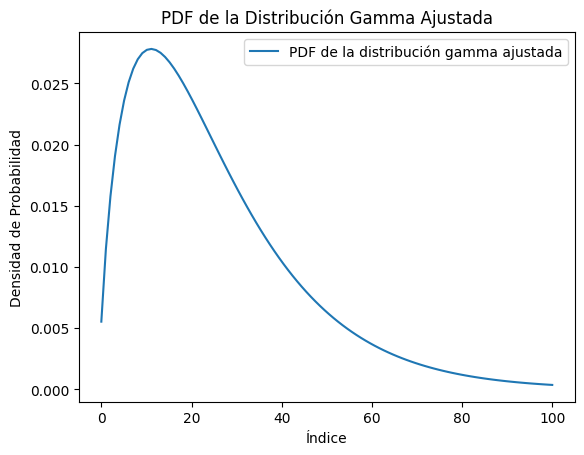

In [ ]:
fitter.fitted_pdf['gamma']

import matplotlib.pyplot as plt
import numpy as np

# Los valores de la función de densidad de probabilidad (PDF)
pdf_values = fitter.fitted_pdf['gamma']


# Crear un arreglo de valores x para la gráfica
x = np.linspace(0, len(pdf_values), len(pdf_values))

# Graficar la PDF
plt.plot(x, pdf_values, label='PDF de la distribución gamma ajustada')
plt.xlabel('Índice')
plt.ylabel('Densidad de Probabilidad')
plt.title('PDF de la Distribución Gamma Ajustada')
plt.legend()
plt.show()


In [ ]:
dfbueno = dfclean.drop("institution", axis=1)
dfbueno = dfbueno.drop("location code", axis=1)
dfbueno = dfbueno.drop("location", axis=1)
dfbueno = dfbueno.drop("score scaled", axis=1)
dfbueno = dfbueno.drop("Rank", axis=1)

dfbueno

,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score_scaled_sigmoid
0,100.0,100.0,100.0,100.0,100.000000,90.000000,96.1,100.000000,99.996500
1,100.0,100.0,100.0,92.3,100.000000,96.300000,99.5,100.000000,100.000000
2,100.0,100.0,100.0,99.9,99.800000,60.300000,96.3,100.000000,96.867699
3,100.0,100.0,100.0,90.0,98.800000,98.400000,99.9,100.000000,99.819464
4,100.0,100.0,99.4,100.0,76.900000,66.900000,100.0,100.000000,95.513579
...,...,...,...,...,...,...,...,...,...
1417,4.6,5.8,3.6,1.0,1.700000,26.545348,8.1,26.186809,6.255698
1418,3.0,5.8,2.4,2.2,9.300000,1.300000,8.8,30.900000,4.790058
1419,2.8,2.6,3.2,3.6,5.200000,2.800000,51.1,26.186809,8.924386
1420,3.3,1.8,2.7,2.0,31.659517,26.545348,7.5,8.700000,6.532231


IndexError: ignored

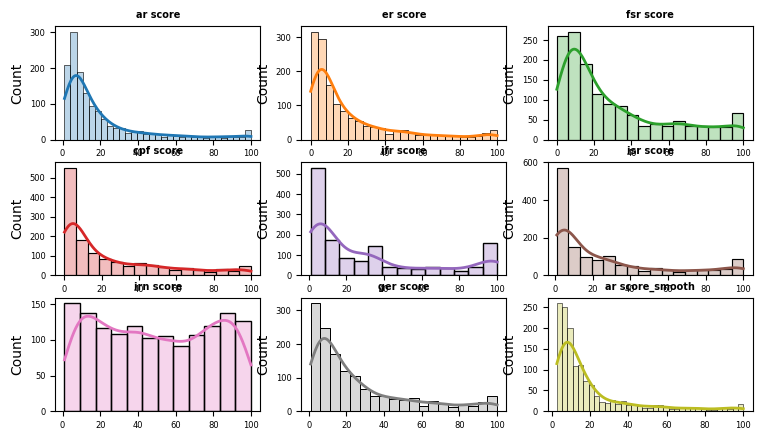

In [ ]:

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
for i, colum in enumerate(dfclean2):
    sns.histplot(
        data     = dfclean2,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)



In [ ]:
# Buscamos verificar la correccion del BAIS del score scaled, definiendo este nuevo parametro
# en base  al informacion que conocemos, en los scores obtenidoos basados en su covarianza con
# el score scaled original propio del dataset dfclean.

dfbueno.describe()



,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score_scaled_sigmoid
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,20.124684,20.642616,29.954923,24.443108,31.659517,26.545348,49.570121,26.186809,26.023657
std,22.802706,24.025717,28.174827,27.899638,32.971465,30.270835,30.066955,26.090171,19.943138
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,5.400000,4.400000,8.200000,3.000000,5.200000,3.400000,21.900000,6.800000,11.188313
50%,10.800000,10.250000,18.200000,10.950000,16.650000,12.350000,48.900000,15.700000,20.542039
75%,23.775000,26.950000,43.475000,39.200000,48.975000,38.625000,77.375000,36.300000,35.063259
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:

print("La cantidad de paises en el estudio son: ", len(dfclean['location'].unique()))
print("La cantidad de universidades en el estudio son: ", len(dfclean['institution'].unique()))
print("La cantidad de codigos postales en el estudio son: ", len(dfclean['location code'].unique()))


La cantidad de paises en el estudio son:  100
La cantidad de universidades en el estudio son:  1422
La cantidad de codigos postales en el estudio son:  100


#Analisis Respecto a Mexico

In [ ]:
mx = dfclean1[dfclean['location'] == 'Mexico']
columna = 'clasificacion'  # Reemplaza 'nombre_de_tu_columna' por el nombre real de tu columna
mx

,Rank,institution,location code,location,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score_scaled_sigmoid,clasificacion,label
104,105,Universidad Nacional Autónoma de México (UNAM),MX,Mexico,96.0,95.1,43.2,2.9,9.300000,2.600000,91.3,61.5,54.654708,bueno,0
169,170,Tecnológico de Monterrey,MX,Mexico,48.8,92.8,72.9,2.2,52.900000,8.600000,65.1,85.6,53.680598,bueno,0
401,402,Colegio de México,MX,Mexico,14.9,3.9,100.0,1.5,10.100000,19.800000,1.7,99.6,26.487256,regular,3
546,547,Universidad Panamericana (UP),MX,Mexico,7.6,29.3,78.2,1.2,12.200000,1.400000,10.8,10.4,15.897006,malo,2
636,637,Universidad Anáhuac México,MX,Mexico,11.8,33.1,55.3,1.1,6.500000,3.500000,2.4,36.1,16.252519,malo,2
730,731,Universidad Iberoamericana IBERO,MX,Mexico,17.5,39.9,29.3,1.3,6.600000,2.600000,7.1,50.0,17.625577,malo,2
764,765,Instituto Politécnico Nacional (IPN),MX,Mexico,20.0,50.9,9.2,2.8,2.900000,1.200000,60.9,9.5,19.258631,malo,2
765,766,Instituto Tecnológico Autónomo de México (ITAM),MX,Mexico,14.2,47.4,11.9,2.0,64.100000,1.700000,5.1,68.7,24.358296,regular,3
784,785,Universidad Autónoma Chapingo,MX,Mexico,3.5,2.5,66.4,1.4,3.100000,1.400000,2.8,7.3,7.239330,malo,2
845,846,"ITESO, Universidad Jesuita de Guadalajara",MX,Mexico,5.7,7.7,44.1,1.0,2.800000,1.600000,2.1,8.5,5.983198,malo,2


In [ ]:
## Busqueda de acuerdo a los parametros de la lista que buscas saber
g = "ger score"
parametro = 99.6
nu = mx[mx[g] == parametro]

print("La informacion que coincide sera ", nu)


La informacion que coincide sera       Rank        institution location code location  ar score  er score  \
401   402  Colegio de México            MX   Mexico      14.9       3.9   

     fsr score  cpf score  ifr score  isr score  irn score  ger score  \
401      100.0        1.5       10.1       19.8        1.7       99.6   

     score_scaled_sigmoid clasificacion  label  
401             26.487256       regular      3  


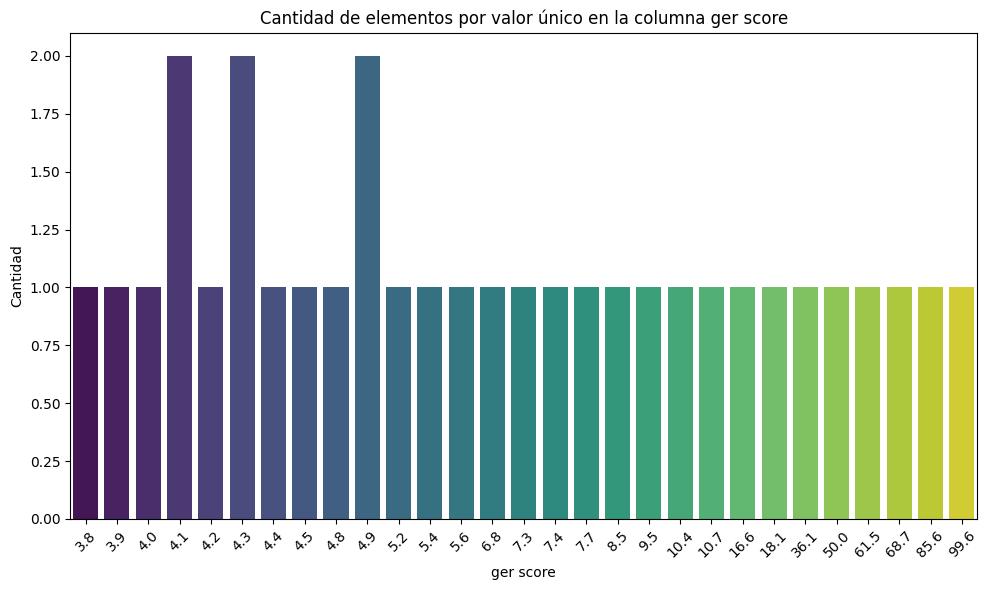

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'mx' es tu DataFrame y 'columna' es la columna que deseas analizar
columna = 'ger score'  # Reemplaza 'nombre_de_tu_columna' por el nombre real de tu columna

# Calcula la cantidad de elementos para cada valor único en la columna
conteo_valores = mx[columna].value_counts()

# Crea un gráfico de barras para visualizar los conteos
plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_valores.index, y=conteo_valores.values, palette='viridis')
plt.xlabel(columna)
plt.ylabel('Cantidad')
plt.title('Cantidad de elementos por valor único en la columna ' + columna)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()

In [ ]:


print("La cantidad de universidades en el estudio en México que son Regulares: ", len(mx[mx['label'] == 3]))

print("La cantidad de universidades en el estudio en mexico que son Malas: ", len(mx[mx['label'] ==2]))

print("La cantidad de universidades en el estudio en mexico que son Excelentes: ", len(mx[mx['label'] ==1]))

print("La cantidad de universidades en el estudio en mexico que son Buenas: ", len(mx[mx['label'] ==0]))



La cantidad de universidades en el estudio en México que son Regulares:  2
La cantidad de universidades en el estudio en mexico que son Malas:  28
La cantidad de universidades en el estudio en mexico que son Excelentes:  0
La cantidad de universidades en el estudio en mexico que son Buenas:  2


[Text(0, 0, '54.6547'),
 Text(0, 0, '53.6806'),
 Text(0, 0, '26.4873'),
 Text(0, 0, '15.897'),
 Text(0, 0, '16.2525'),
 Text(0, 0, '17.6256'),
 Text(0, 0, '19.2586'),
 Text(0, 0, '24.3583'),
 Text(0, 0, '7.23933'),
 Text(0, 0, '5.9832'),
 Text(0, 0, '7.10408'),
 Text(0, 0, '6.80024'),
 Text(0, 0, '10.538'),
 Text(0, 0, '11.6663'),
 Text(0, 0, '11.5055'),
 Text(0, 0, '5.85577'),
 Text(0, 0, '11.2782'),
 Text(0, 0, '10.0803'),
 Text(0, 0, '6.64338'),
 Text(0, 0, '3.02958'),
 Text(0, 0, '1.73433'),
 Text(0, 0, '2.60325'),
 Text(0, 0, '1.46116'),
 Text(0, 0, '3.49996'),
 Text(0, 0, '4.61673'),
 Text(0, 0, '1.11594'),
 Text(0, 0, '2.08779'),
 Text(0, 0, '3.93699'),
 Text(0, 0, '2.85028'),
 Text(0, 0, '8.72995'),
 Text(0, 0, '6.21007'),
 Text(0, 0, '7.58312')]

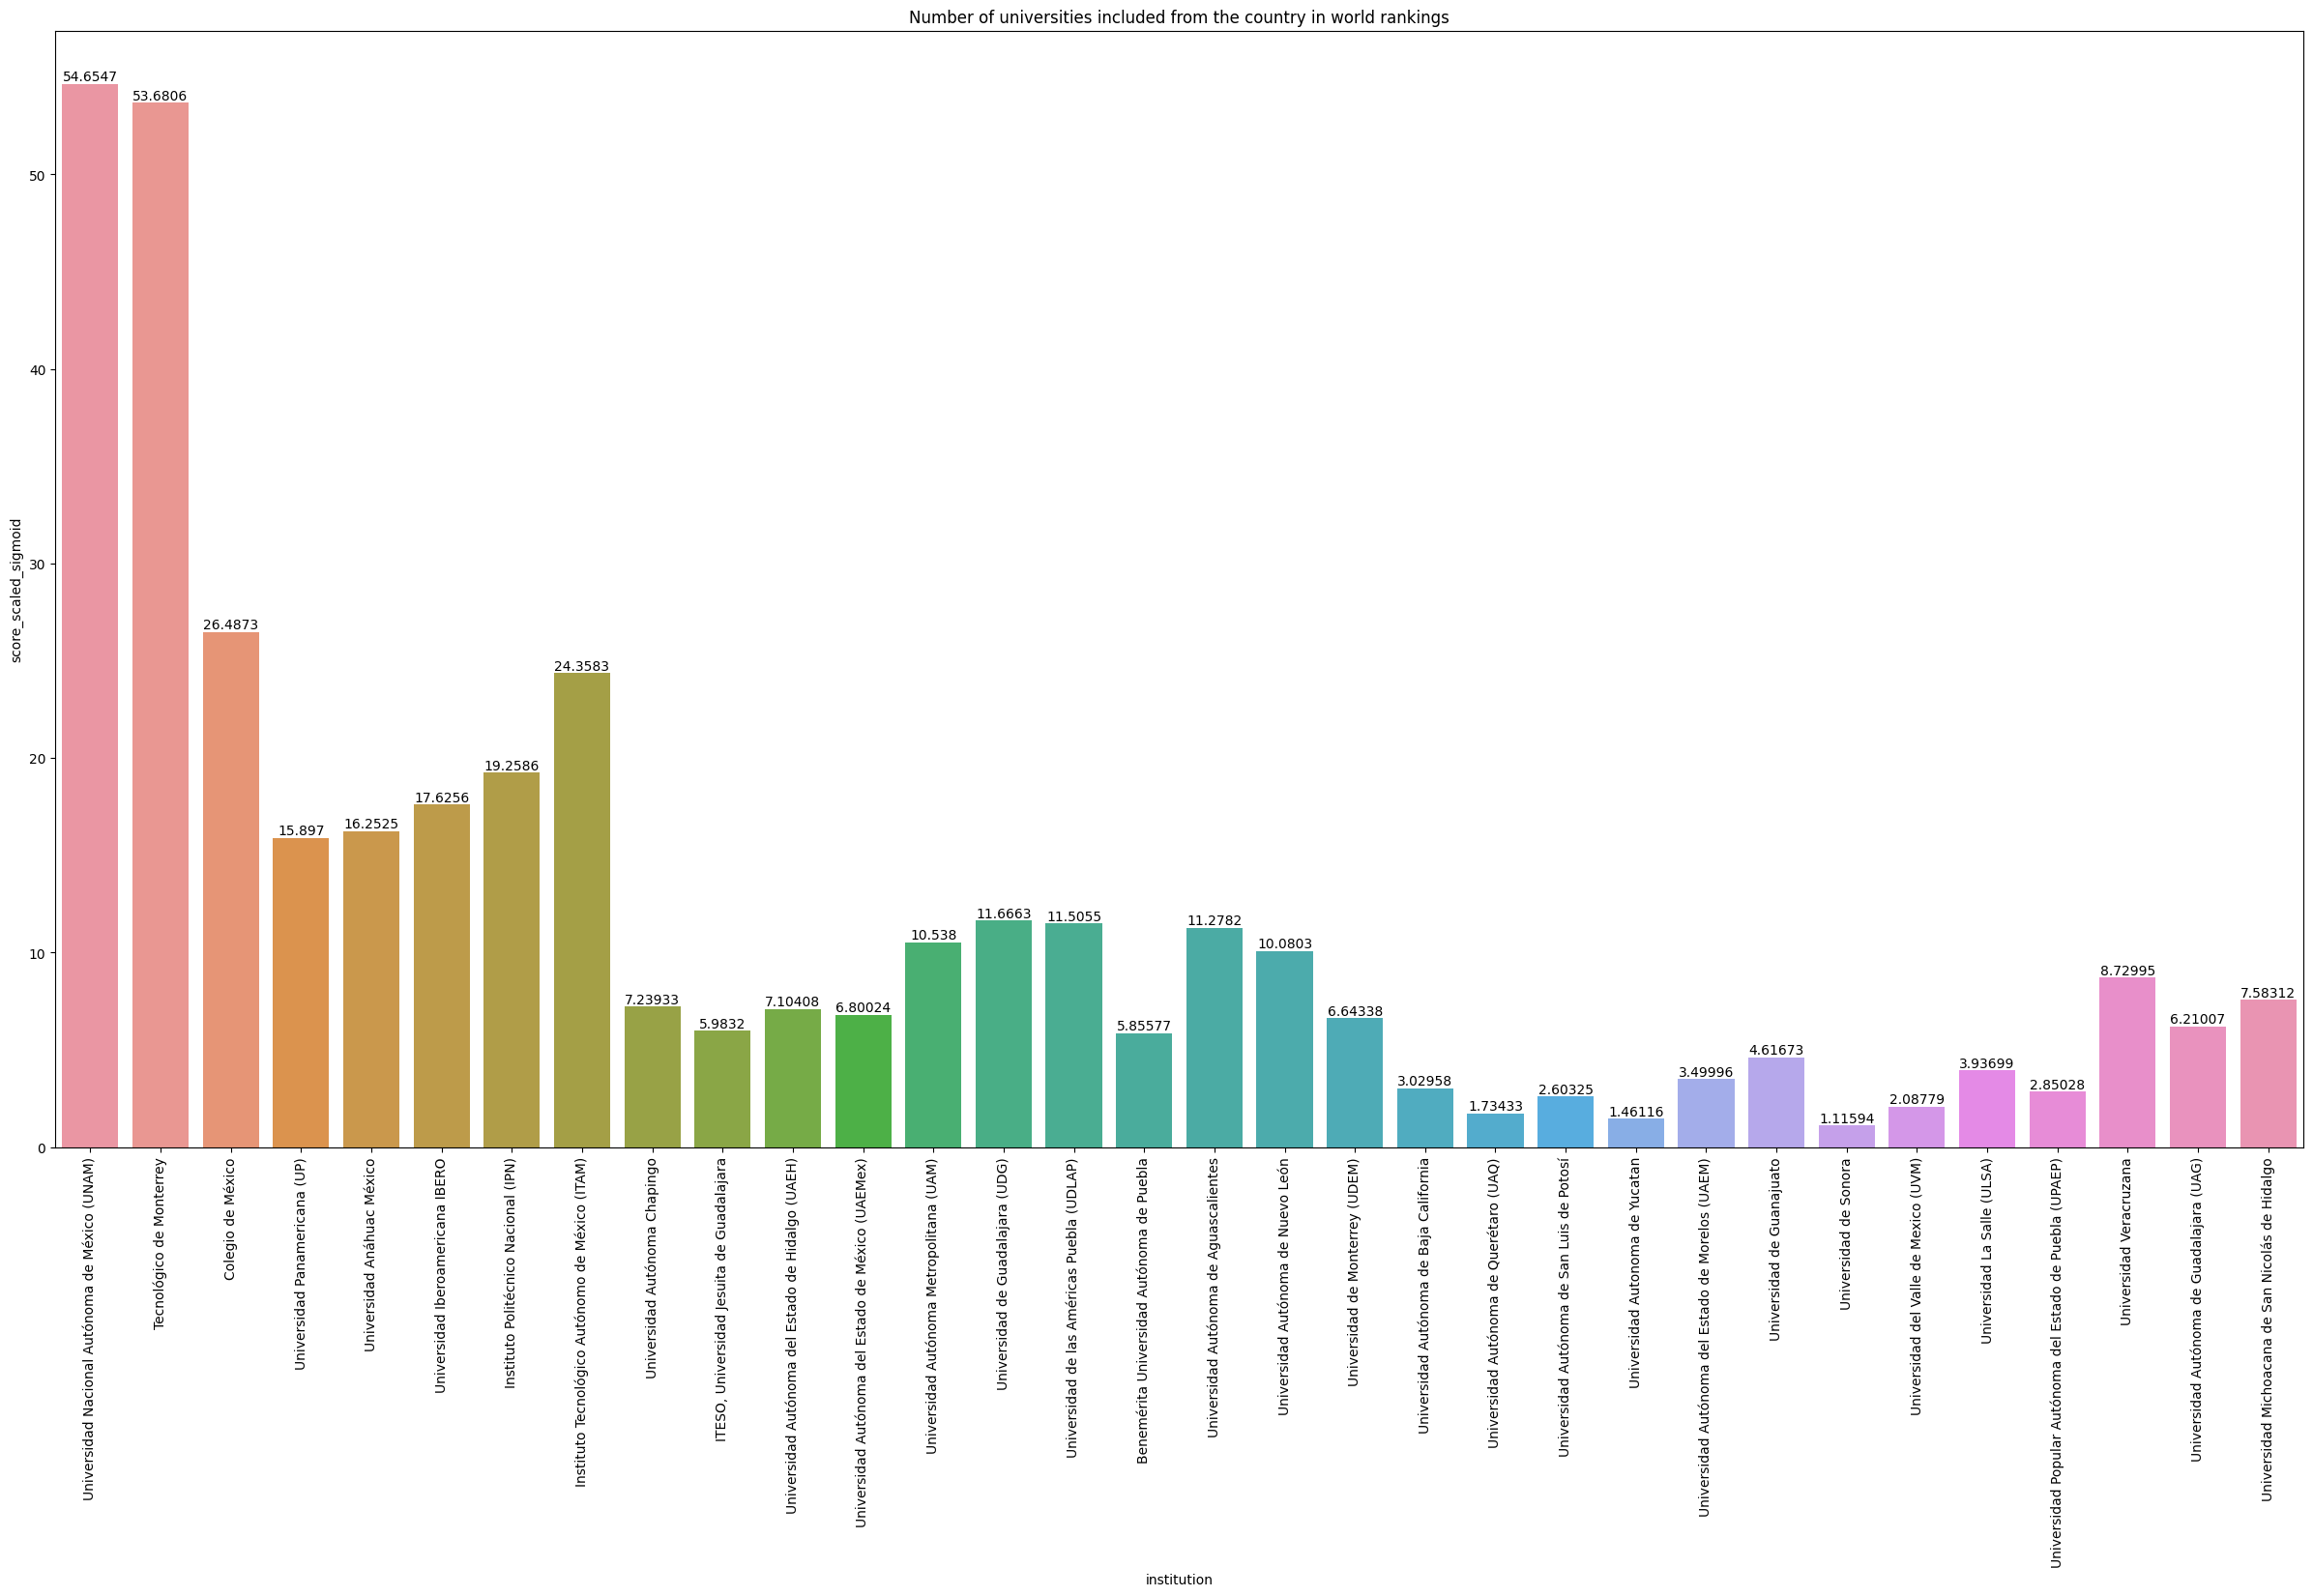

In [ ]:


plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.title('Number of universities included from the country in world rankings')
ax = sns.barplot(x='institution', y='score_scaled_sigmoid',data=mx)
ax.bar_label(ax.containers[0])



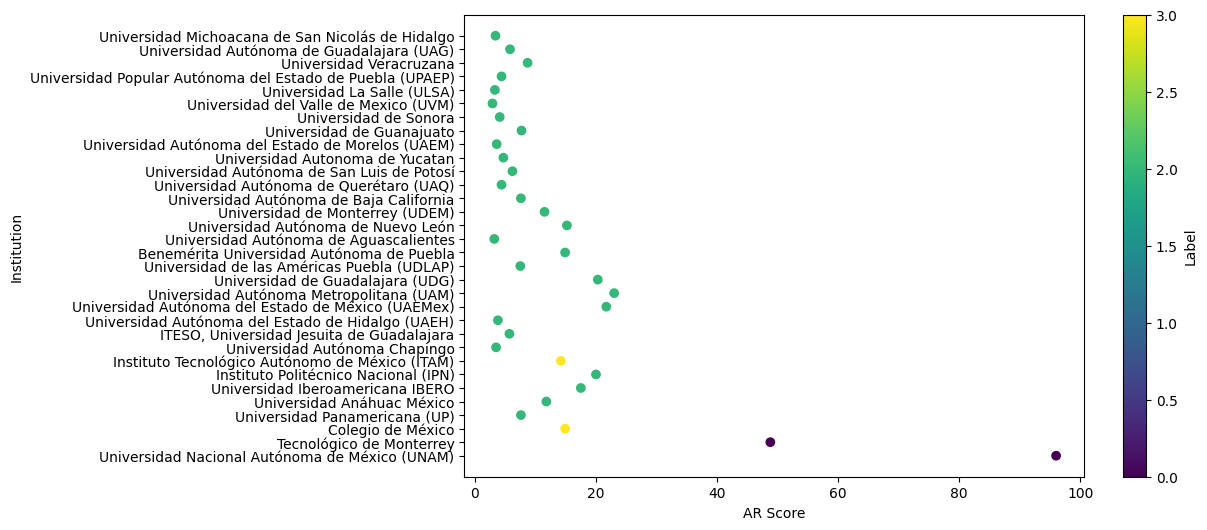

In [ ]:
import matplotlib.pyplot as plt

# Obtener los datos de institution, ar score y label
instituciones = mx['institution']
ar_scores = mx['ar score']
labels = mx['label']

# Crear una figura y los ejes
plt.figure(figsize=(10, 6))

# Crear un gráfico de dispersión con colores según la label
scatter = plt.scatter(ar_scores, instituciones, c=labels, cmap='viridis')

# Agregar una barra de colores para mostrar la correspondencia entre label y color
cbar = plt.colorbar(scatter)
cbar.set_label('Label')

# Etiquetar los ejes
plt.xlabel('AR Score')
plt.ylabel('Institution')

# Mostrar el gráfico
plt.show()


<ipython-input-50-8a6c97e96088>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(labels.unique()))


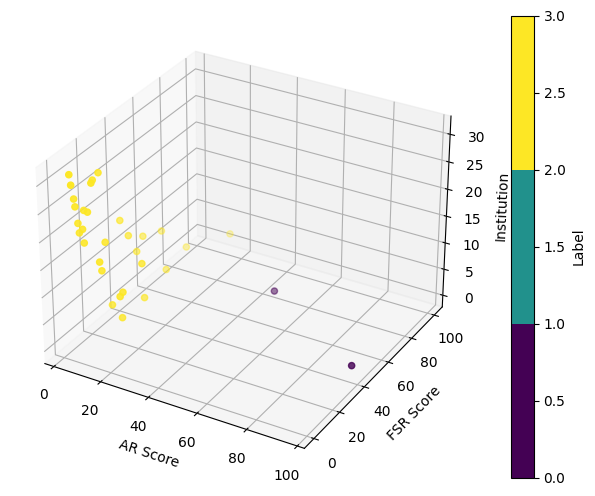

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Obtener los datos de institution, ar score y label
instituciones = mx['institution']
ar_scores = mx['ar score']
labels = mx['label']
fsr_scores = mx['fsr score']
# Crear una figura 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Crear un colormap para asignar colores a las etiquetas
colormap = plt.cm.get_cmap('viridis', len(labels.unique()))

# Crear un gráfico de dispersión en 3D con colores según la label
scatter = ax.scatter(ar_scores, fsr_scores, np.arange(len(instituciones)), c=labels, cmap=colormap)

# Agregar una barra de colores para mostrar la correspondencia entre label y color
cbar = plt.colorbar(scatter)
cbar.set_label('Label')

# Etiquetar los ejes
ax.set_xlabel('AR Score')
ax.set_ylabel('FSR Score')
ax.set_zlabel('Institution')

# Mostrar el gráfico
plt.show()


# Nuevo

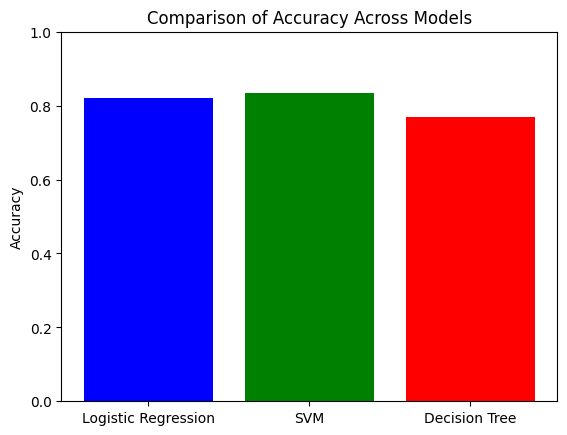

In [102]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'SVM', 'Decision Tree']
accuracies = [accuracy_logistic, accuracy_svm, accuracy_dt]

# Crear un gráfico de barras
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Across Models')
plt.ylim([0, 1])  # Establecer el límite del eje y entre 0 y 1 (porcentaje)
plt.show()


In [111]:
print("La Accuracy del modelo de Logistic Regression con tres variables es:", accuracy_logistic)
print("La Accuracy del modelo de Logistic Regression con dos variables es:", accuracy_logistic2)
print("La Accuracy del modelo de Support Vector Machine con tres variables es:", accuracy_svm)
print("La Accuracy del modelo de Support Vector Machine con dos variables es:", accuracy_svm2)
print("La Accuracy del modelo de Decision Tree con tres variables es:", accuracy_dt)
print("La Accuracy del modelo de Decision Tree con dos variables es:", accuracy_dt2)


La Accuracy del modelo de Logistic Regression con tres variables es: 0.8210526315789474
La Accuracy del modelo de Logistic Regression con dos variables es: 0.7929824561403509
La Accuracy del modelo de Support Vector Machine con tres variables es: 0.8350877192982457
La Accuracy del modelo de Support Vector Machine con dos variables es: 0.7964912280701755
La Accuracy del modelo de Decision Tree con tres variables es: 0.7684210526315789
La Accuracy del modelo de Decision Tree con dos variables es: 0.7403508771929824


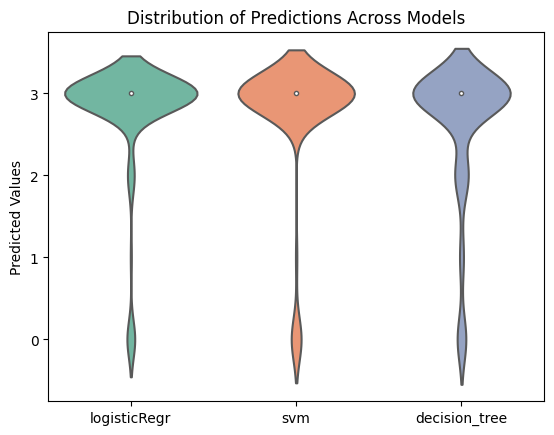

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

predictions = [y_pred_logistic, y_pred_svm, y_pred_dt]
models = ['logisticRegr', 'svm', 'decision_tree']

sns.violinplot(data=predictions, palette='Set2')
plt.xticks(range(3), models)
plt.ylabel('Predicted Values')
plt.title('Distribution of Predictions Across Models')
plt.show()


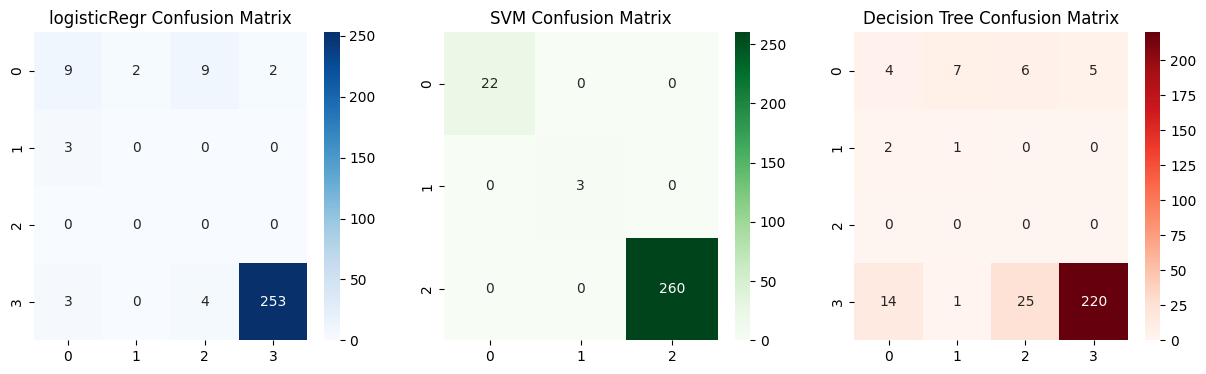

In [107]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_logistic = confusion_matrix(y_pred, y_pred_logistic)
cm_svm = confusion_matrix(y_pred, y_pred_svm)
cm_dt = confusion_matrix(y_pred, y_pred_dt)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', ax=axes[0])
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Reds', ax=axes[2])

axes[0].set_title('logisticRegr Confusion Matrix')
axes[1].set_title('SVM Confusion Matrix')
axes[2].set_title('Decision Tree Confusion Matrix')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

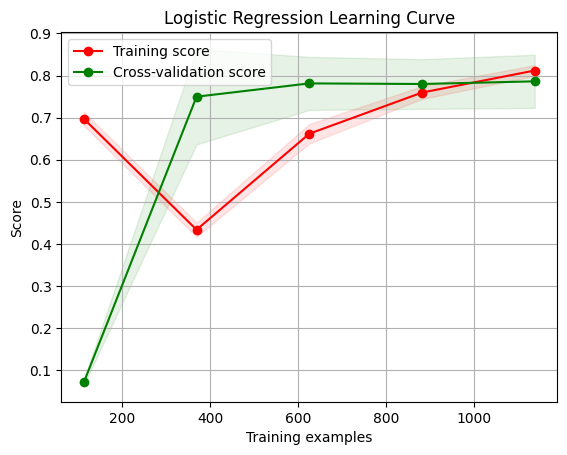

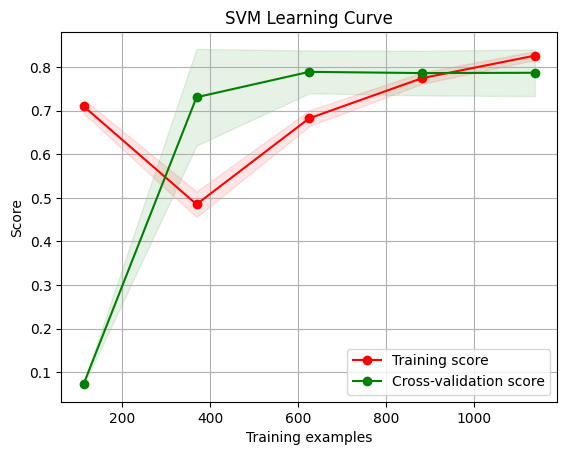

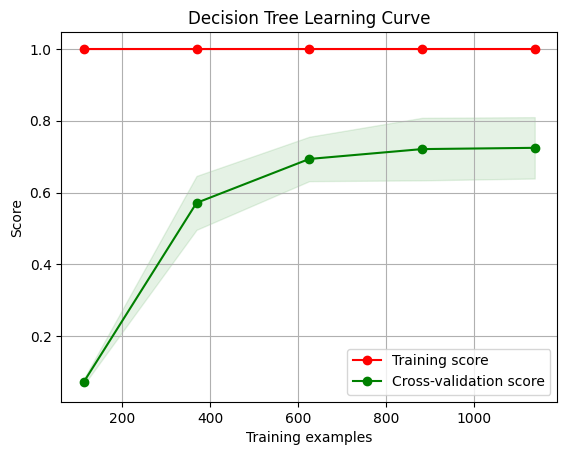

In [112]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Usar la función para cada modelo
plot_learning_curve(logisticRegr, "Logistic Regression Learning Curve", X, y, cv=5)
plot_learning_curve(svm, "SVM Learning Curve", X, y, cv=5)
plot_learning_curve(decision_tree, "Decision Tree Learning Curve", X, y, cv=5)

plt.show()
